In [2]:
import pandas as pd


In [4]:
data = pd.read_csv('taxifare.csv') ## sampled dtaset of 12,000 values.

In [5]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [7]:
data.shape

(120000, 8)

In [125]:
#As per the Pickup_datatime column, it is in the UTC format, but the dataset is completely New York time values. 
#There is a 4-hour lag between the two.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


##As per the above information, the Data Type of pickup_datetime, it is object type(string)

In [15]:
import datetime ## Feature Engineering is done w.r.t datetime

In [19]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])-datetime.timedelta(hours=4)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [46]:
##THE DATA TYPE IN PICKUP_DATETIME IS NOT AN OBJECT, INSTEAD IN DATE AND TIME FORMAT.

In [22]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 00:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 07:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 03:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 13:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 18:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [24]:
data['pickup_datetime'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
119995    2010
119996    2010
119997    2010
119998    2010
119999    2010
Name: pickup_datetime, Length: 120000, dtype: int64

In [41]:
data['year']=data['pickup_datetime'].dt.year

In [42]:
data['pickup_datetime'].dt.month

0         4
1         4
2         4
3         4
4         4
         ..
119995    4
119996    4
119997    4
119998    4
119999    4
Name: pickup_datetime, Length: 120000, dtype: int64

In [43]:
data['month']=data['pickup_datetime'].dt.month

In [27]:
data['pickup_datetime'].dt.day

0         19
1         17
2         17
3         11
4         16
          ..
119995    18
119996    23
119997    18
119998    13
119999    17
Name: pickup_datetime, Length: 120000, dtype: int64

In [28]:
data['day']=data['pickup_datetime'].dt.day

In [30]:
data['pickup_datetime'].dt.hour

0          0
1          7
2          3
3         13
4         18
          ..
119995     6
119996     2
119997    10
119998     0
119999     8
Name: pickup_datetime, Length: 120000, dtype: int64

In [49]:
data['hour']=data['pickup_datetime'].dt.hour

In [32]:
data['pickup_datetime'].dt.minute

0         17
1         43
2         23
3         25
4         19
          ..
119995    33
119996    27
119997    50
119998    14
119999     0
Name: pickup_datetime, Length: 120000, dtype: int64

In [36]:
data['minute']=data['pickup_datetime'].dt.minute

In [44]:
data.shape

(120000, 13)

In [45]:
import numpy as np

########### since there will be a difference in taxi fare

In [55]:
data['ampm']=np.where(data['hour']<12,0,1)

In [56]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,hour,minute,month,ampm
0,2010-04-19 00:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,19,0,17,4,0
1,2010-04-17 07:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,17,7,43,4,0
2,2010-04-17 03:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,17,3,23,4,0
3,2010-04-11 13:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,11,13,25,4,1
4,2010-04-16 18:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,16,18,19,4,1


################# pickup_datetime is not needed anymore

In [60]:
data.shape

(120000, 14)

In [64]:
data.drop('pickup_datetime', axis=1,inplace=True)

In [62]:
data.shape

(120000, 14)

In [66]:
np.radians(data['dropoff_latitude']-data["pickup_latitude"])

0         0.000248
1         0.000062
2         0.000264
3        -0.000144
4         0.000156
            ...   
119995   -0.000834
119996   -0.000564
119997   -0.000733
119998    0.000109
119999   -0.000155
Length: 120000, dtype: float64

In [68]:
def haversine(data):
    ##we use haversine distance since the earth in spherical in shape.

    lat1= np.radians(data["pickup_latitude"])
    lat2 = np.radians(data["dropoff_latitude"])
    ## Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(data['dropoff_latitude']-data["pickup_latitude"])
    dlong = np.radians(data["dropoff_longitude"]-data["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers.
    return c * r

In [69]:
data['Total distance']=haversine(data)

In [70]:
data.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,hour,minute,month,ampm,Total distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,19,0,17,4,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,17,7,43,4,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,17,3,23,4,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,11,13,25,4,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,16,18,19,4,1,7.231321


In [71]:
data.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [72]:
data.head()

,fare_amount,fare_class,passenger_count,year,day,hour,minute,month,ampm,Total distance
0,6.5,0,1,2010,19,0,17,4,0,2.126312
1,6.9,0,1,2010,17,7,43,4,0,1.392307
2,10.1,1,2,2010,17,3,23,4,0,3.326763
3,8.9,0,1,2010,11,13,25,4,1,1.864129
4,19.7,1,1,2010,16,18,19,4,1,7.231321


# FEATURE ENGINEERING


In [73]:
x=data.iloc[:,1:]

In [74]:
y=data.iloc[:,0]

In [83]:
### Feature Engineering - importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [94]:
## ploting a graph, to know the importance of features used.
feature_importances_=pd.Series(model.feature_importances_,index=x.columns)


<AxesSubplot:>

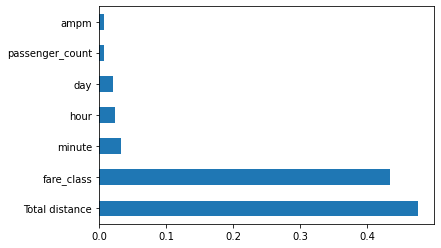

In [95]:
feature_importances_.nlargest(7).plot(kind='barh')

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

# XGBOOST

In [102]:
pip install xgboost

In [105]:
import xgboost

In [106]:
regressor = xgboost.XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_pred = regressor.predict(x_test)

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

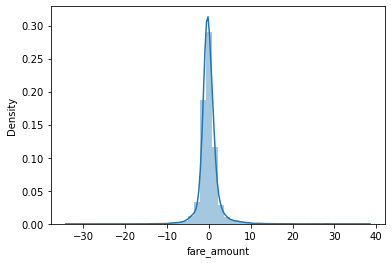

In [116]:
sns.distplot(y_test-y_pred) ## Gaussian Distribution

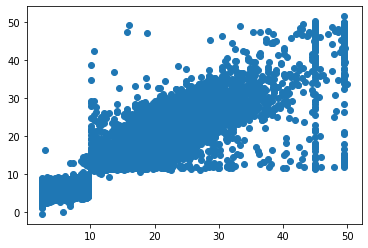

In [118]:
plt.scatter(y_test,y_pred)

In [120]:
from sklearn import metrics

In [121]:
print('R-square:',np.sqrt(metrics.r2_score(y_test,y_pred)))

R-square: 0.940339789501875


In [122]:
regressor = xgboost.XGBRegressor()

In [123]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)